# Business understanding
Our goal is to find different kinds of correlating information about the spending habits of the customers in the dataset e.g. how a customers age or level of education affects their purchasing habits. We approached this analysis from the perspective of a marketing team trying to figure out the most effective way to operate.

## Data Understanding


### People
**Basic information about the customer.**
- Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise


### Products
**Information about the amount spent on product groups by a customer.**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


### Promotion
**Information about the customer's promotion participation.**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


### Place
**Information about the location of the customer's activity.**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

The dataset has 2240 rows of data. The data is ten years old therefore the customers' shopping habits might not reflect the current state of shopping habits.

## Data Preparation
New columns created:
- **TotalSpent**: Sum of money spent on products.
- **Age**: Age of the customer.
- **Has_Partner**: 1 if the customer is married or living together, 0 if not.
 
Dropped : **ID**, **Z_CostContact**, **Z_Revenue,Response** unnecessary columns,  also merged all campaign participation columns into one new column **"AcceptedCmpAny"**. 

Removed unnecessary rows that had "meme" values in them eg. "Absurd", "YOLO". 

Outliers were removed from income and age by using the IQR method.

In total 39 rows were removed during filtering.

Customers were grouped based on their income and spending habits.

In [1]:
import pandas  as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('data/marketing_campaign.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [2]:
df = df.dropna()

# Creating own columns for later use.
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df["Age"] = 2015 - df["Year_Birth"]



df = df[~df["Marital_Status"].isin(["Absurd", "YOLO"])]

df["Has_Partner"] = df["Marital_Status"].apply(lambda x: 1 if x in ["Together", "Married"] else 0)

df["AcceptedCmpAny"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"]
df["AcceptedCmpAny"] = df["AcceptedCmpAny"].apply(lambda x: 1 if x > 0 else 0)

df["IsAlone"] = df["Kidhome"] + df["Teenhome"] + df["Has_Partner"]
df["IsAlone"] = df["IsAlone"].apply(lambda x: 1 if x == 0 else 0)
df["SingleParent"] = ((df["Has_Partner"] == 0) & ((df["Kidhome"] > 0) | (df["Teenhome"] > 0))).astype(int)

df["HigherEducation"] = df["Education"].apply(lambda x: 1 if x in ["Master", "PhD"] else 0)


df["above_average_store"] = df["NumStorePurchases"] > df["NumStorePurchases"].mean()
df["above_average_web"] = df["NumWebPurchases"] > df["NumWebPurchases"].mean()
df = df.drop(columns=["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"], axis=1)
# Removing unrelevant columns.
df.drop(columns = ['ID',"Z_CostContact","Z_Revenue","Response"] , axis=1, inplace=True)

In [3]:
# Filtering outliers
Q1 = df.Income.quantile(0.25)
Q3 = df.Income.quantile(0.75)
IQR = Q3 - Q1

Income_outliers = df[df.Income > Q3 + 1.5*IQR]
df = df[df.Income < Q3 + 1.5*IQR]
Income_outliers.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain,TotalSpent,Age,Has_Partner,AcceptedCmpAny,IsAlone,SingleParent,HigherEducation,above_average_store,above_average_web
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,...,0,1608,42,1,0,0,0,1,False,False
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,...,0,107,39,1,0,0,0,1,False,False
655,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,...,0,6,40,0,0,1,0,0,False,False
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,...,0,1717,33,1,0,0,0,1,False,False
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,...,0,59,44,1,0,0,0,1,False,False
1653,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,...,0,1730,38,1,0,0,0,0,False,False
2132,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,...,0,8,66,1,0,0,0,1,False,False
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,...,0,62,38,1,0,0,0,0,False,False


In [4]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1

Age_outliers = df[df.Age > Q3 + 1.5*IQR]
df = df[df.Age < Q3 + 1.5*IQR]
Age_outliers.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain,TotalSpent,Age,Has_Partner,AcceptedCmpAny,IsAlone,SingleParent,HigherEducation,above_average_store,above_average_web
192,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,...,1,65,115,0,0,0,1,0,False,False
239,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,...,0,22,122,0,0,0,1,0,False,False
339,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,...,0,1853,116,1,1,0,0,1,False,False


In [5]:
# Created new columns for income and spending habits based on quantiles.
num_groups = 3
df["IncomeCategory"] = pd.qcut(df["Income"], q=num_groups, labels=["Low Income", "Medium Income", "High Income"])
df["SpendingHabits"] = pd.qcut(df["TotalSpent"], q=num_groups, labels=["Low Spender", "Medium Spender", "High Spender"])

In [6]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Age,Has_Partner,AcceptedCmpAny,IsAlone,SingleParent,HigherEducation,above_average_store,above_average_web,IncomeCategory,SpendingHabits
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,58,0,0,1,0,0,False,True,Medium Income,High Spender
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,61,0,0,0,1,0,False,False,Medium Income,Low Spender
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,50,1,0,0,0,0,True,True,High Income,Medium Spender
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,31,1,0,0,0,0,False,False,Low Income,Low Spender
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,34,1,0,0,0,1,True,True,Medium Income,Medium Spender


In [7]:
mutable_df = df.copy()
mutable_df['above_average_wine'] = df['MntWines'].mean() < df['MntWines']
mutable_df['over_40'] = 2015 - df['Year_Birth'] > 40
mutable_df['under_average_wine'] = df['MntWines'].mean() > df['MntWines']
mutable_df['under_40'] = 2015 - df['Year_Birth'] < 40
mutable_df.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,SingleParent,HigherEducation,above_average_store,above_average_web,IncomeCategory,SpendingHabits,above_average_wine,over_40,under_average_wine,under_40
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,False,True,Medium Income,High Spender,True,True,False,False
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,0,False,False,Medium Income,Low Spender,False,True,True,False
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,True,True,High Income,Medium Spender,True,True,False,False
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,False,False,Low Income,Low Spender,False,False,True,True
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,1,True,True,Medium Income,Medium Spender,False,False,True,True
5,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,...,0,1,True,True,Medium Income,Medium Spender,True,True,False,False
6,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,...,1,0,True,True,Medium Income,Medium Spender,False,True,True,False
7,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,...,0,1,False,False,Low Income,Medium Spender,False,False,True,True
8,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,...,0,1,False,False,Low Income,Low Spender,False,True,True,False
9,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,...,0,1,False,False,Low Income,Low Spender,False,True,True,False


In [8]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Age,Has_Partner,AcceptedCmpAny,IsAlone,SingleParent,HigherEducation,above_average_store,above_average_web,IncomeCategory,SpendingHabits
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,58,0,0,1,0,0,False,True,Medium Income,High Spender
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,61,0,0,0,1,0,False,False,Medium Income,Low Spender
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,50,1,0,0,0,0,True,True,High Income,Medium Spender
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,31,1,0,0,0,0,False,False,Low Income,Low Spender
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,34,1,0,0,0,1,True,True,Medium Income,Medium Spender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,48,1,0,0,0,0,False,True,Medium Income,High Spender
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,69,1,1,0,0,1,False,True,High Income,Medium Spender
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,34,0,1,1,0,0,True,False,Medium Income,High Spender
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,59,1,0,0,0,1,True,True,High Income,High Spender


# Data Analysis



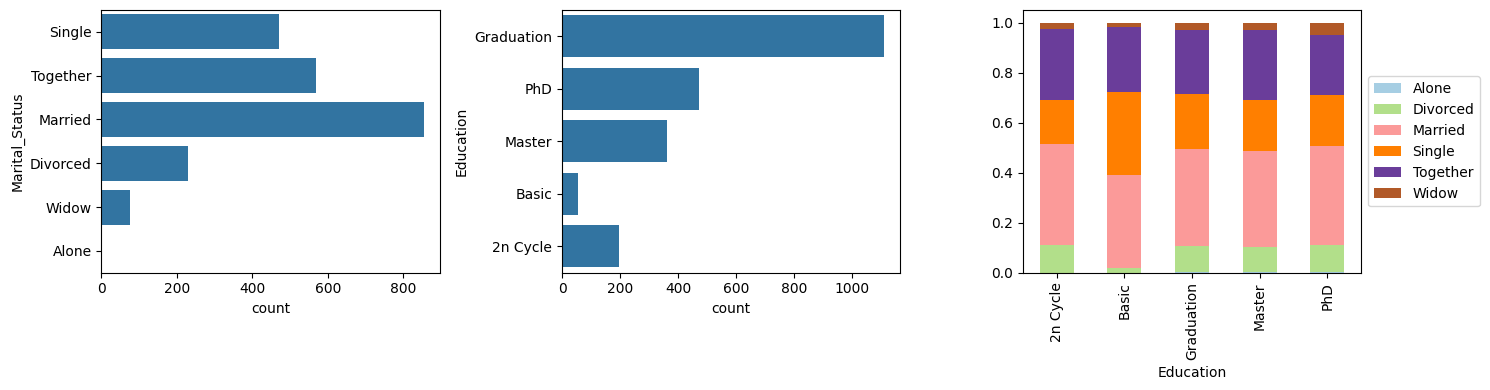

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(15,4))

sns.countplot(df['Marital_Status'], ax=ax[0])
sns.countplot(df['Education'], ax=ax[1])
df_plot = df.groupby(['Marital_Status', 'Education']).size().reset_index().pivot(columns='Marital_Status', index='Education', values=0,)

df_plot.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[2],  colormap='Paired')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

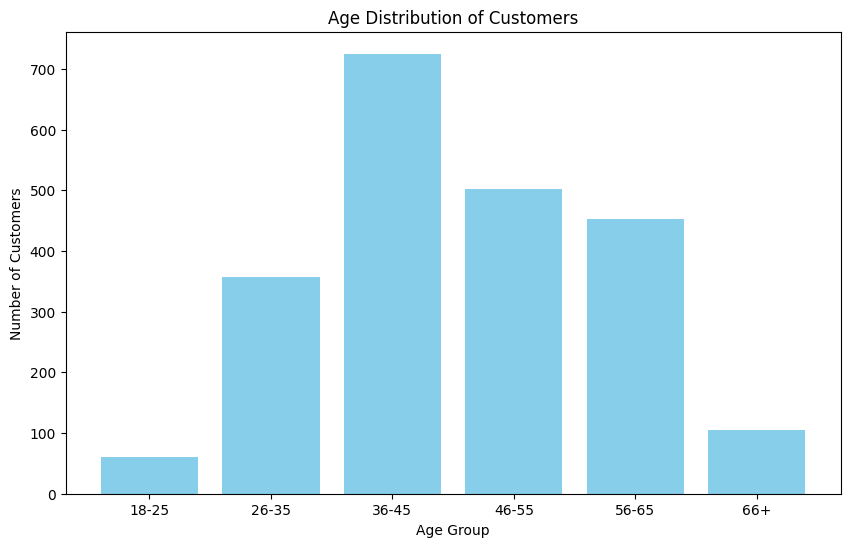

In [10]:
bins = [17, 25, 35, 45, 55, 65, 100]  # 17 ensures ages 18 and up are included
labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)
age_counts = df["AgeGroup"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(age_counts.index.astype(str), age_counts.values, color="skyblue")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.title("Age Distribution of Customers")
plt.xticks(rotation=0)
plt.show()

### Products purchases by income category
We plotted the amount spent on each product category by each income group to help visualize and analyze the differences between income groups so that marketing efforts could be used more effectively. For example this knowledge could be used to push wine harder for the high income customers or an alternative cheaper wine could be produced to capture the low income customers.

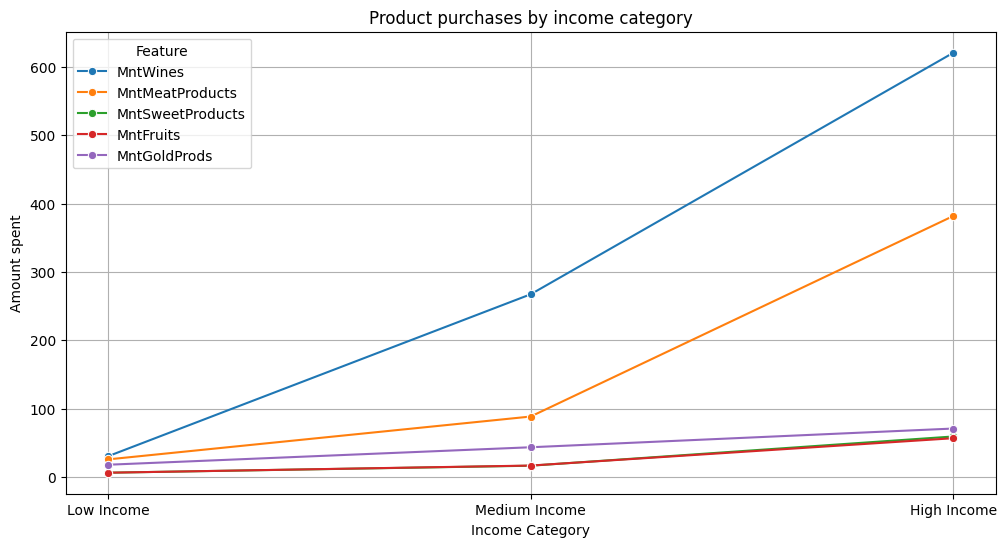

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
features_to_plot = ["MntWines","MntMeatProducts" ,"MntSweetProducts", "MntFruits", "MntGoldProds"]

df_melted = df.melt(id_vars=["IncomeCategory"], value_vars=features_to_plot, var_name="Feature", value_name="Value")
category_order = ["Low Income","Medium Income","High Income" ]
df_melted["IncomeCategory"] = pd.Categorical(df_melted["IncomeCategory"], categories=category_order, ordered=True)
plt.figure(figsize=(12, 6))
sns.lineplot(x="IncomeCategory", y="Value", hue="Feature", data=df_melted, marker="o",errorbar=None)

plt.title("Product purchases by income category")
plt.xlabel("Income Category")
plt.ylabel("Amount spent")
plt.grid(True)
plt.show()

### Income and spending
Here we analyze the total amount of money spent in relation to income level. As expected the more money a customer has the more money they spend. What's interesting to note is that as you progress into higher levels of income the more variance there is in the amount they spent. This could be explained by a lower income customer not being able to spend money that they don't have.

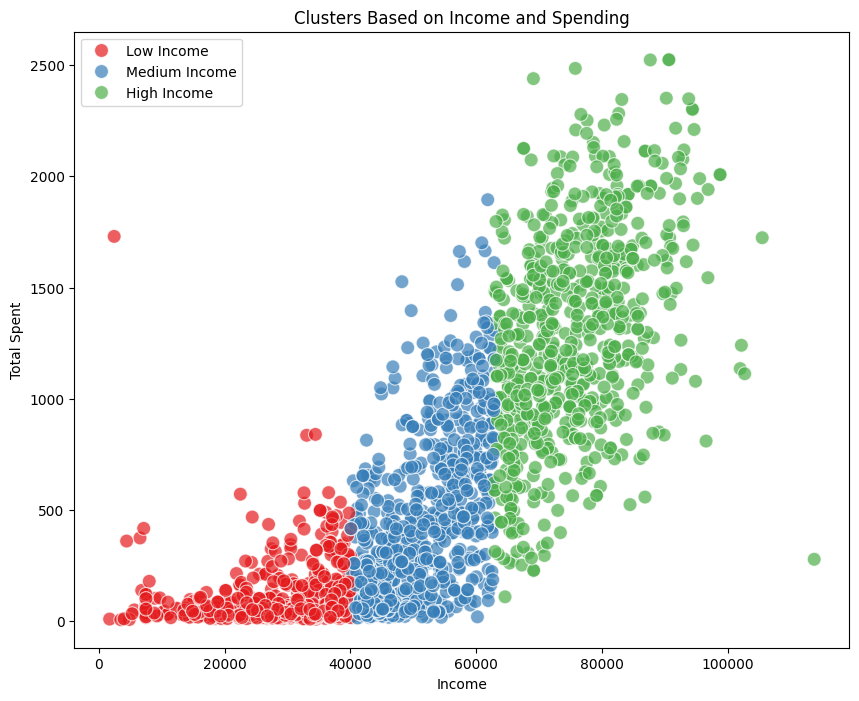

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df["Income"], y=df["TotalSpent"], hue=df["IncomeCategory"],palette="Set1", s=100, alpha=0.7)
plt.xlabel("Income")
plt.ylabel("Total Spent")
plt.title("Clusters Based on Income and Spending")
plt.legend()
plt.show()

### Children
Analyzing how number and age of children affect amount spent on each category.

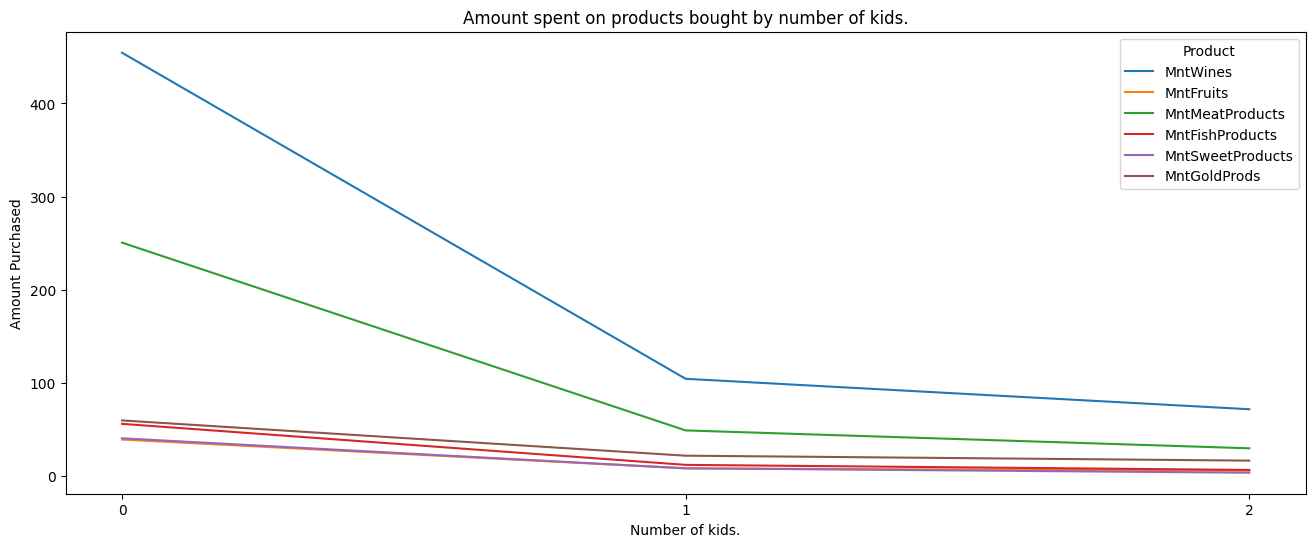

In [13]:
products_long = pd.melt(mutable_df, id_vars=['Kidhome'],
                       value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                       var_name='Product', value_name='Amount')

plt.figure(figsize=(16, 6))
sns.lineplot(data=products_long, x='Kidhome', y='Amount', hue='Product', errorbar=None)
plt.title('Amount spent on products bought by number of kids.')
plt.xlabel('Number of kids.')
plt.ylabel('Amount Purchased')
plt.xticks(list(range(products_long['Kidhome'].min(), products_long['Kidhome'].max() + 1)))
plt.legend(title='Product')
plt.show()

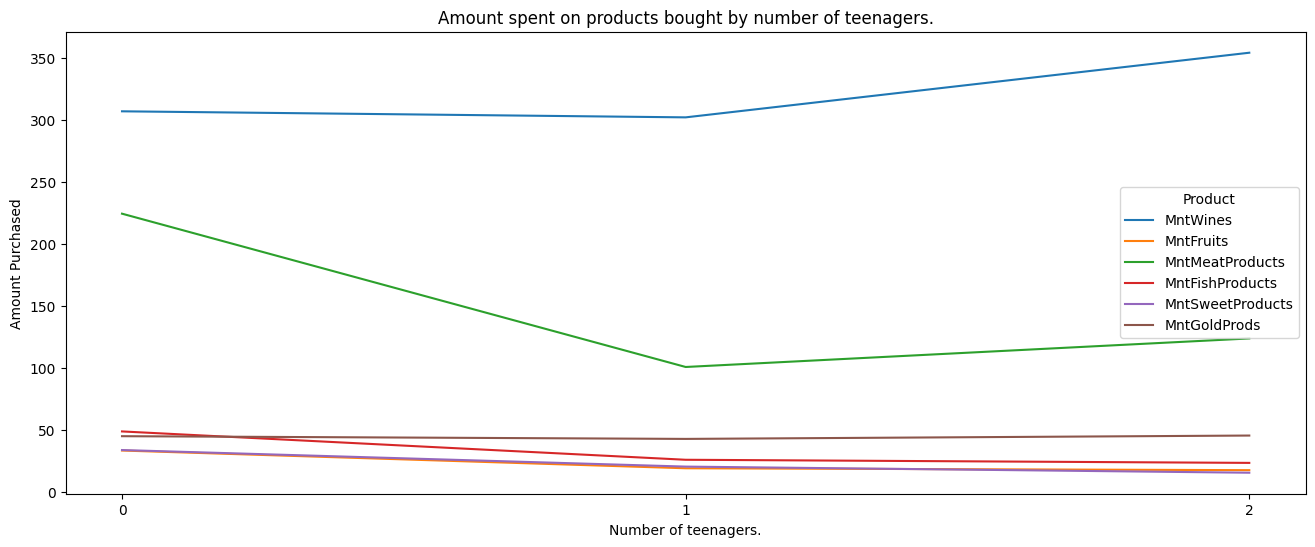

In [14]:
products_long = pd.melt(mutable_df, id_vars=['Teenhome'],
                       value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                       var_name='Product', value_name='Amount')
plt.figure(figsize=(16, 6))

sns.lineplot(data=products_long, x='Teenhome', y='Amount', hue='Product', errorbar=None)

plt.title('Amount spent on products bought by number of teenagers.')
plt.xlabel('Number of teenagers.')
plt.ylabel('Amount Purchased')
plt.xticks(list(range(products_long['Teenhome'].min(), products_long['Teenhome'].max() + 1)))

plt.legend(title='Product')
plt.show()

### Age
In terms of age there isn't a lot of variance in anything except for amount of money spent on wine and meat products. This could be used in decisions regarding what kind of advertisements to produce to target the correct age demographics. 

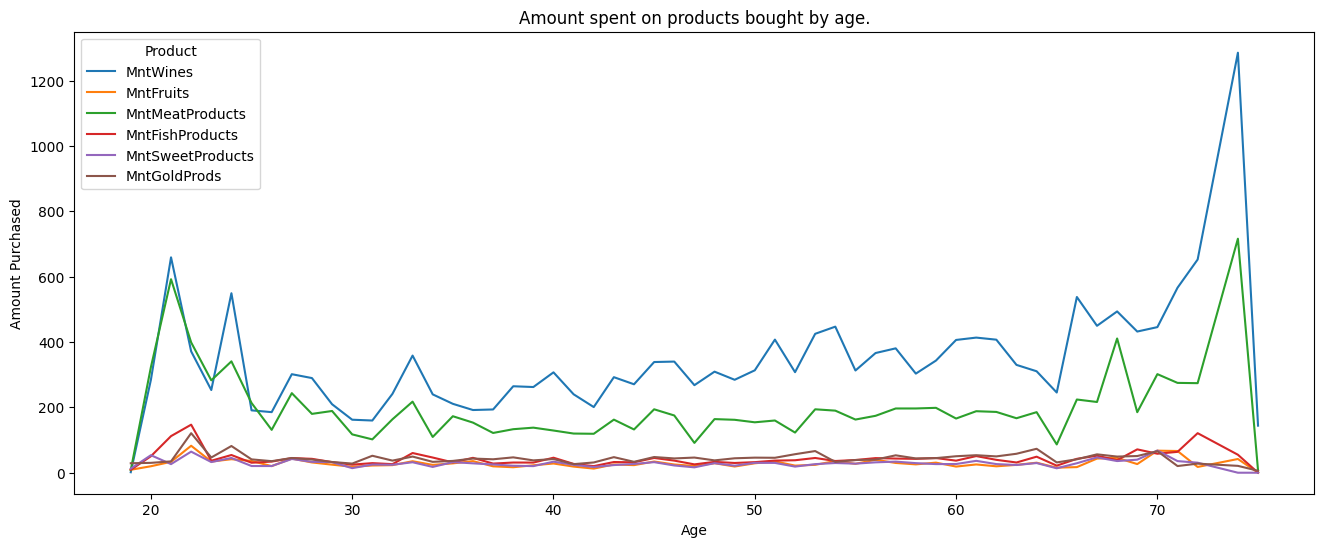

In [15]:
mutable_df['Age'] = 2015 - mutable_df['Year_Birth']
products_long = pd.melt(mutable_df, id_vars=['Age'], 
                       value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                       var_name='Product', value_name='Amount')
plt.figure(figsize=(16, 6))

sns.lineplot(data=products_long, x='Age', y='Amount', hue='Product', errorbar=None)

plt.title('Amount spent on products bought by age.')
plt.xlabel('Age')
plt.ylabel('Amount Purchased')

plt.legend(title='Product')
plt.show()

## Living arrangement
Analyzing how living arrangement affects purchases. 'Not Alone' includes any sort of living arrangement where a person isn't living by themself whether it be a couple living together or a family of four. Living arrangement has more of an effect on the absolute amount of money spent but the relationships between categories don't change that much with the exception of gold products where people living alone spend about 65% of what people living not alone spend. Compared to the other categories where the difference varies between 45%-55%.

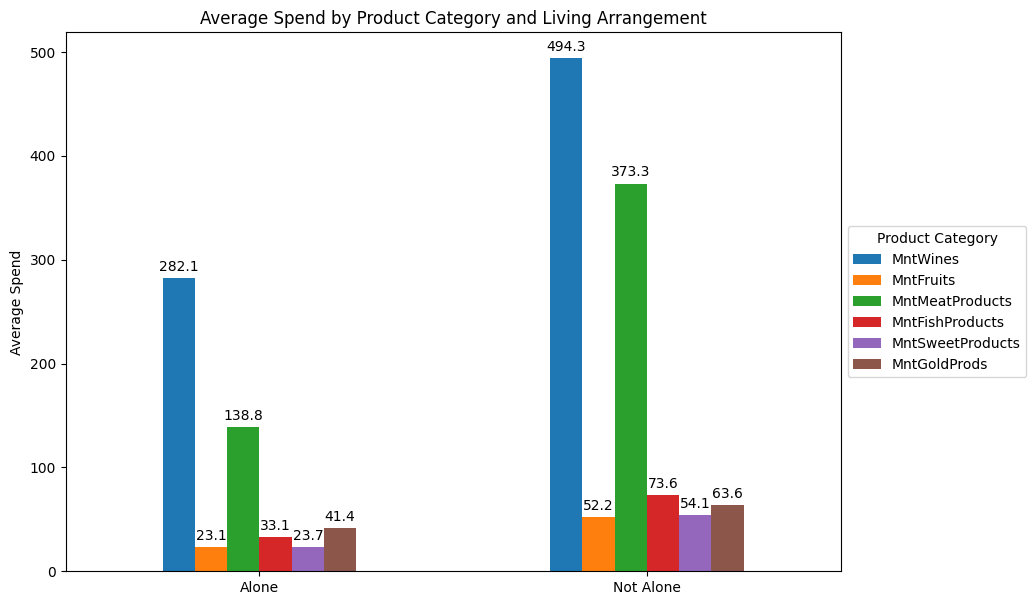

In [16]:
purchase_cols = ["MntWines", "MntFruits", "MntMeatProducts",
                 "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

avg_category = df.groupby("IsAlone")[purchase_cols].mean()

ax = avg_category.plot(kind='bar', figsize=(10, 7))
plt.ylabel("Average Spend")
plt.title("Average Spend by Product Category and Living Arrangement")
plt.xticks(ticks=[0,1], labels=['Alone', 'Not Alone'], rotation=0)
plt.legend(title='Product Category', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3)

plt.show()

### Income category and living arrangement
Seeing the differences in total spending by income category and living arrangement. In the high income category there is very little difference in total money spent between living alone and not living alone. Both the low income and medium income differences can probably be attributed to the amount of people living together. For marketing purposes there probably shouldn't be much of a difference in advertising for these categories.

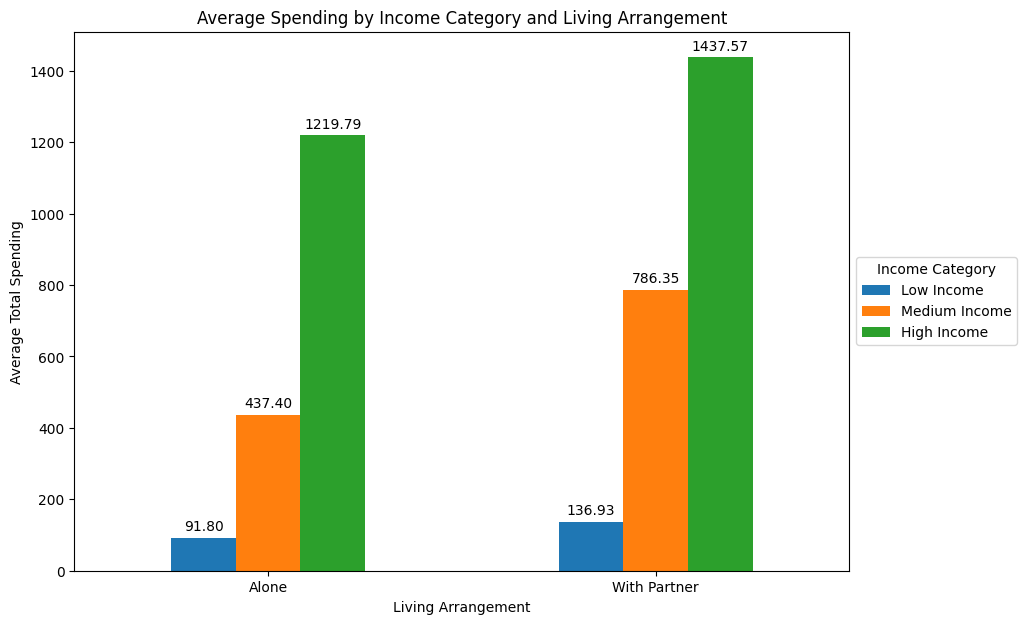

In [17]:
df_poor = df[df["IncomeCategory"] == "Low Income"]
df_high_income = df[df["IncomeCategory"] == "High Income"]
df_medium_income = df[df["IncomeCategory"] == "Medium Income"]

avg_spend_high_income = df_high_income.groupby("IsAlone")["TotalSpent"].mean()
avg_spend_med_income = df_medium_income.groupby("IsAlone")["TotalSpent"].mean()
avg_spend_poor = df_poor.groupby("IsAlone")["TotalSpent"].mean()

df_spend = pd.DataFrame({
    "Low Income": avg_spend_poor,
    "Medium Income": avg_spend_med_income,
    "High Income": avg_spend_high_income,
})


df_spend.index = df_spend.index.map({0: "Alone", 1: "With Partner"})


ax = df_spend.plot(kind="bar", figsize=(10, 7))
plt.xlabel("Living Arrangement")
plt.ylabel("Average Total Spending")
plt.title("Average Spending by Income Category and Living Arrangement")
plt.legend(title="Income Category", loc="center left", bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=0)



for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3)

plt.show()


### Spending habits at each education level
There isn't a lot of difference between education levels and spending habits except for the Basic level where the most money is spent on gold products and least on wine. In every other category wine is the most spent on followed by meat products with sweets or fruits being at the bottom.

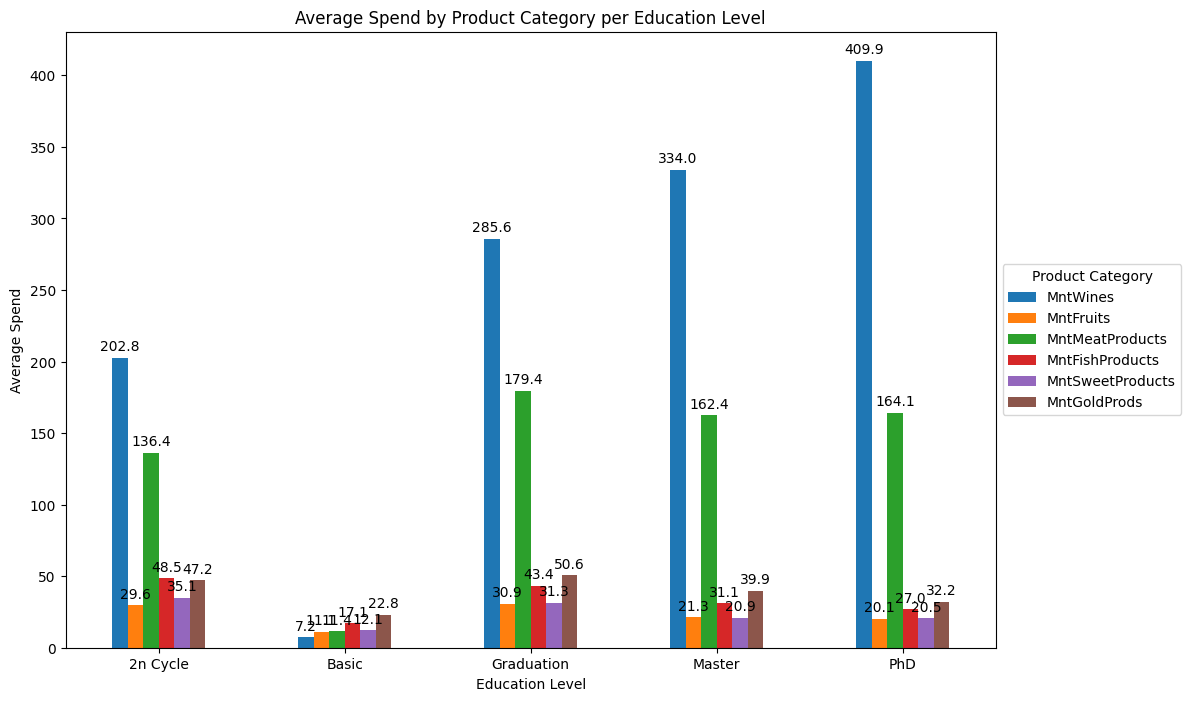

In [18]:
education_avg = df.groupby("Education")[purchase_cols].mean()


ax = education_avg.plot(kind='bar', figsize=(12,8))
plt.xlabel("Education Level")
plt.ylabel("Average Spend")
plt.title("Average Spend by Product Category per Education Level")
plt.xticks(rotation=0)
plt.legend(title="Product Category", loc="center left", bbox_to_anchor=(1, 0.5))
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", padding=3)

plt.show()

### Web purchases
Counter-intuitively the more a customer visits a website the fewer web purchases they do. This information could be used to optimize the UI to incentivize purchases better.

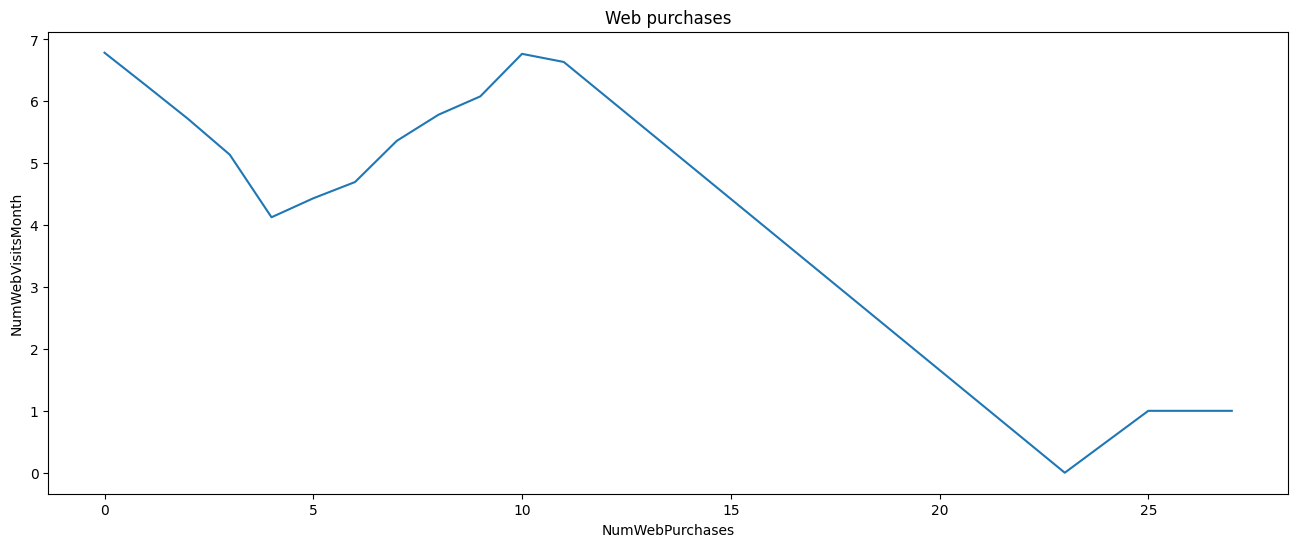

In [19]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='NumWebPurchases', y='NumWebVisitsMonth', errorbar=None)
plt.title('Web purchases')
plt.show()

### Web purchases vs. in-store purchases
There aren't a lot of differences between age groups when it comes to purchase location. The dataset being ten years old we can assume that the relationships between the number of purchases have flipped.

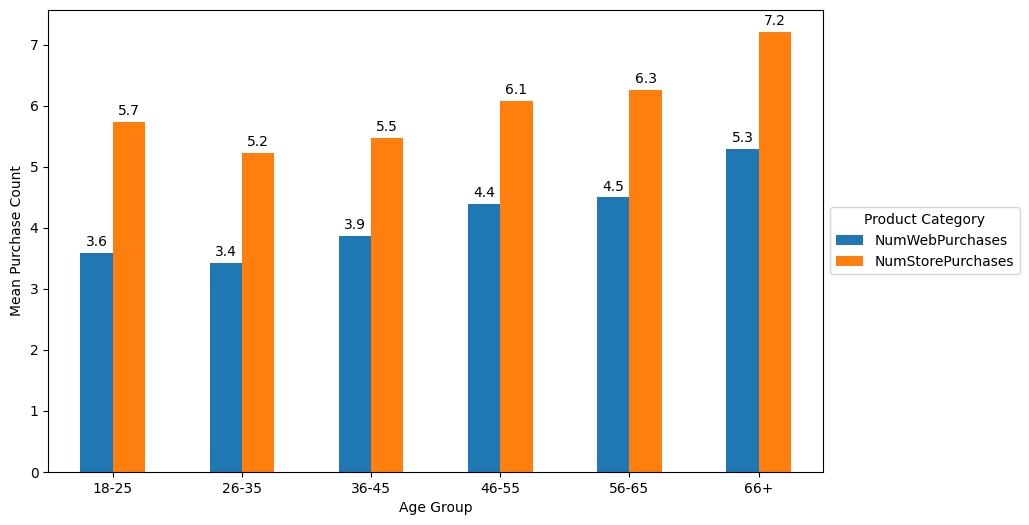

In [20]:
store_web = ["NumWebPurchases", "NumStorePurchases"]
store_web_avg = df.groupby("AgeGroup")[store_web].mean()


ax = store_web_avg.plot(kind='bar', figsize=(10,6))
plt.xlabel("Age Group")
plt.ylabel("Mean Purchase Count")
plt.title("")
plt.xticks(rotation=0)
plt.legend(title="Product Category", loc="center left", bbox_to_anchor=(1, 0.5))


for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", padding=3)

plt.show()

# Modeling

In [21]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

new = mutable_df.filter(['above_average_wine', 'over_40', 'under_average_wine', 'under_40'], axis = 1)
freq = apriori(new, min_support=0.01, use_colnames = True)
rules = association_rules(freq, metric='confidence', min_threshold=0)
rules.sort_values(by='support', ascending=False)
desired_cons3 = ["under_average_wine","above_average_wine"]
filtered_rules = rules[rules["consequents"].apply(lambda x: any(item in x for item in desired_cons3))]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(over_40),(above_average_wine),0.651976,0.386642,0.279873,0.429268,1.110246,1.0,0.027791,1.074686,0.285322,0.368862,0.069496,0.576561
2,(under_40),(above_average_wine),0.310768,0.386642,0.093594,0.301170,0.778936,1.0,-0.026562,0.877692,-0.291668,0.155004,-0.139352,0.271619
4,(over_40),(under_average_wine),0.651976,0.613358,0.372104,0.570732,0.930504,1.0,-0.027791,0.900701,-0.176685,0.416582,-0.110246,0.588699
7,(under_40),(under_average_wine),0.310768,0.613358,0.217174,0.698830,1.139352,1.0,0.026562,1.283803,0.177456,0.307198,0.221064,0.526452


In [22]:
# Päätelmiä:
# 57% yli 40v ostaa alle keskimäärän viiniä
# 30% alle 40v ostaa yli keskimäärän viiniä
# etc

In [23]:

mutable_df['above_average_web'] = mutable_df['NumWebPurchases'].mean() < mutable_df['NumWebPurchases']
mutable_df['above_average_cat'] = mutable_df['NumCatalogPurchases'].mean() < mutable_df['NumCatalogPurchases']
mutable_df['above_average_store'] = mutable_df['NumStorePurchases'].mean() < mutable_df['NumStorePurchases']
mutable_df['under_average_web'] = mutable_df['NumWebPurchases'].mean() > mutable_df['NumWebPurchases']
mutable_df['under_average_cat'] = mutable_df['NumCatalogPurchases'].mean() > mutable_df['NumCatalogPurchases']
mutable_df['under_average_store'] = mutable_df['NumStorePurchases'].mean() > mutable_df['NumStorePurchases']
new = mutable_df.filter(['above_average_web', 'over_40', 'above_average_cat', 'under_40', 'above_average_store',
                        'under_average_web', 'under_average_cat', 'under_average_store'], axis = 1)
freq = apriori(new, min_support=0.4, use_colnames = True)
rules = association_rules(freq, metric='confidence', min_threshold=0.5)
rules.sort_values(by='support', ascending=False)
# 54% yli 40v ostaa alle keskiarvon kaikista paikoista

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
5,(under_average_cat),(under_average_store),0.605634,0.564743,0.477510,0.788447,1.396116,1.0,0.135483,2.057437,0.719451,0.689180,0.513958,0.816991
4,(under_average_store),(under_average_cat),0.564743,0.605634,0.477510,0.845535,1.396116,1.0,0.135483,2.553110,0.651862,0.689180,0.608321,0.816991
0,(under_average_cat),(under_average_web),0.605634,0.618810,0.472967,0.780945,1.262012,1.0,0.098195,1.740160,0.526451,0.629383,0.425340,0.772631
1,(under_average_web),(under_average_cat),0.618810,0.605634,0.472967,0.764317,1.262012,1.0,0.098195,1.673292,0.544648,0.629383,0.402376,0.772631
3,(under_average_web),(under_average_store),0.618810,0.564743,0.458428,0.740822,1.311786,1.0,0.108959,1.679376,0.623522,0.632206,0.404541,0.776284
2,(under_average_store),(under_average_web),0.564743,0.618810,0.458428,0.811746,1.311786,1.0,0.108959,2.024870,0.546070,0.632206,0.506141,0.776284
6,"(under_average_store, under_average_cat)",(under_average_web),0.477510,0.618810,0.427079,0.894386,1.445334,1.0,0.131591,3.609289,0.589711,0.638153,0.722937,0.792274
7,"(under_average_cat, under_average_web)",(under_average_store),0.472967,0.564743,0.427079,0.902978,1.598917,1.0,0.159974,4.486161,0.710727,0.699405,0.777092,0.829606
8,"(under_average_store, under_average_web)",(under_average_cat),0.458428,0.605634,0.427079,0.931615,1.538249,1.0,0.149439,5.766891,0.646101,0.670471,0.826596,0.818396
9,(under_average_cat),"(under_average_store, under_average_web)",0.605634,0.458428,0.427079,0.705176,1.538249,1.0,0.149439,1.836935,0.887272,0.670471,0.455615,0.818396


In [24]:
df[(df["Has_Partner"] == 1) & (df["Kidhome"] > 0)]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Has_Partner,AcceptedCmpAny,IsAlone,SingleParent,HigherEducation,above_average_store,above_average_web,IncomeCategory,SpendingHabits,AgeGroup
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,1,0,0,0,0,False,False,Low Income,Low Spender,26-35
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,1,0,0,0,1,True,True,Medium Income,Medium Spender,26-35
7,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,...,1,0,0,0,1,False,False,Low Income,Medium Spender,26-35
8,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,...,1,0,0,0,1,False,False,Low Income,Low Spender,36-45
9,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,...,1,1,0,0,1,False,False,Low Income,Low Spender,56-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,1979,Graduation,Married,63777.0,1,1,24-03-2013,87,457,5,...,1,0,0,0,0,True,True,High Income,Medium Spender,36-45
2229,1972,Graduation,Married,24434.0,2,0,18-05-2014,9,3,2,...,1,0,0,0,0,False,False,Low Income,Low Spender,36-45
2234,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,...,1,0,0,0,0,False,False,Low Income,Low Spender,36-45
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,1,1,0,0,1,False,True,High Income,Medium Spender,66+


interesting columns: 
- numWebVisitsMonth
- numWebPurchases
- numStorePurchases
- numStoreVisitsMonth
- acceptedCmpAny

In [25]:
bins = [17, 35,55, 100]  # 17 ensures ages 18 and up are included
labels = ["18-35", "36-55", "56+"]
df_hot = df[["Education","IncomeCategory","AcceptedCmpAny"]].copy()


df_hot["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)
#df_hot['above_average_wine'] = df['MntWines'].mean() < df['MntWines']
#df_hot['under_average_wine'] = df['MntWines'].mean() > df['MntWines']

df_hot = pd.get_dummies(df_hot,columns=["Education","AgeGroup","IncomeCategory"])

df_hot



,AcceptedCmpAny,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,AgeGroup_18-35,AgeGroup_36-55,AgeGroup_56+,IncomeCategory_Low Income,IncomeCategory_Medium Income,IncomeCategory_High Income
0,0,False,False,True,False,False,False,False,True,False,True,False
1,0,False,False,True,False,False,False,False,True,False,True,False
2,0,False,False,True,False,False,False,True,False,False,False,True
3,0,False,False,True,False,False,True,False,False,True,False,False
4,0,False,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,False,False,True,False,False,False,True,False,False,True,False
2236,1,False,False,False,False,True,False,False,True,False,False,True
2237,1,False,False,True,False,False,True,False,False,False,True,False
2238,0,False,False,False,True,False,False,False,True,False,False,True


In [26]:

freq = apriori(df_hot, min_support=0.05, use_colnames = True)
rules = association_rules(freq, metric='confidence', min_threshold=0.05)
rules.sort_values(by='support', ascending=False)

desired_cons = "AcceptedCmpAny" 
filtered_rules = rules[rules["consequents"].apply(lambda x: desired_cons in list(x))]
filtered_rules

C:\Users\skill\PycharmProjects\dataK-koneO\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Education_Graduation),(AcceptedCmpAny),0.505225,0.207633,0.103135,0.204137,0.983162,1.0,-0.001766,0.995607,-0.033457,0.169151,-0.004412,0.350427
2,(Education_PhD),(AcceptedCmpAny),0.215357,0.207633,0.051340,0.238397,1.148164,1.0,0.006625,1.040393,0.164462,0.138142,0.038825,0.242831
4,(AgeGroup_36-55),(AcceptedCmpAny),0.557474,0.207633,0.104952,0.188264,0.906716,1.0,-0.010798,0.976139,-0.188632,0.158981,-0.024444,0.346867
6,(AgeGroup_56+),(AcceptedCmpAny),0.253067,0.207633,0.059064,0.233393,1.124066,1.0,0.006519,1.033603,0.147768,0.147059,0.032511,0.258929
9,(IncomeCategory_Medium Income),(AcceptedCmpAny),0.333030,0.207633,0.053158,0.159618,0.768751,1.0,-0.015990,0.942865,-0.310826,0.109040,-0.060597,0.207818
11,(IncomeCategory_High Income),(AcceptedCmpAny),0.333485,0.207633,0.124943,0.374659,1.804432,1.0,0.055701,1.267097,0.668865,0.300218,0.210794,0.488205
54,"(AgeGroup_36-55, Education_Graduation)",(AcceptedCmpAny),0.282144,0.207633,0.054066,0.191626,0.922910,1.0,-0.004516,0.980199,-0.104232,0.124088,-0.020201,0.226010
57,(AgeGroup_36-55),"(Education_Graduation, AcceptedCmpAny)",0.557474,0.103135,0.054066,0.096985,0.940365,1.0,-0.003429,0.993189,-0.125343,0.089139,-0.006858,0.310607
58,(Education_Graduation),"(AgeGroup_36-55, AcceptedCmpAny)",0.505225,0.104952,0.054066,0.107014,1.019648,1.0,0.001042,1.002309,0.038946,0.097222,0.002304,0.311083
61,"(Education_Graduation, IncomeCategory_High Inc...",(AcceptedCmpAny),0.176738,0.207633,0.065425,0.370180,1.782858,1.0,0.028728,1.258085,0.533369,0.205128,0.205141,0.342639


56+y accepted atleast one campaign 23% with 6% support
36-55y accepted atleast one campaign 18% with 10% support
high spenders tend to accept campaigns(39% support 13%)

education_graduation 20% campaign acceptance rate support 10%

phd accepted 24% campaign(support only 5%)

people with medium income tend to accept campaigns 15% (support 5%)

people with high income tend to accept campaigns 37% (support 12%)

medium income people tend to accept campaigns 16% (support 6%)

POOR PEOPLE DOES NOT ACCEPT CAMPAIGNS and lowly educated people




In [27]:
bins = [17, 35,55, 100] 
labels = ["18-35", "36-55", "56+"]
df_hot = df[["Education","AcceptedCmpAny","SpendingHabits"]].copy()


df_hot["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)


df_hot = pd.get_dummies(df_hot,columns=["Education","AgeGroup","SpendingHabits"])

freq = apriori(df_hot, min_support=0.05, use_colnames = True)
rules = association_rules(freq, metric='confidence', min_threshold=0.05)
rules.sort_values(by='support', ascending=False)

desired_cons2 = ["SpendingHabits_High Spender","SpendingHabits_Medium Spender","SpendingHabits_Low Spender"]
filtered_rules = rules[rules["consequents"].apply(lambda x: any(item in x for item in desired_cons2))]
filtered_rules

C:\Users\skill\PycharmProjects\dataK-koneO\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
9,(AcceptedCmpAny),(SpendingHabits_High Spender),0.207633,0.333030,0.133121,0.641138,1.925163,1.0,0.063973,1.858568,0.606491,0.326644,0.461951,0.520433
16,(Education_Graduation),(SpendingHabits_Low Spender),0.505225,0.333939,0.162653,0.321942,0.964075,1.0,-0.006061,0.982307,-0.070039,0.240430,-0.018011,0.404509
19,(Education_Graduation),(SpendingHabits_Medium Spender),0.505225,0.333030,0.167197,0.330935,0.993709,1.0,-0.001059,0.996868,-0.012634,0.249154,-0.003141,0.416491
21,(Education_Graduation),(SpendingHabits_High Spender),0.505225,0.333030,0.175375,0.347122,1.042314,1.0,0.007120,1.021584,0.082050,0.264565,0.021128,0.436863
25,(Education_Master),(SpendingHabits_Medium Spender),0.164925,0.333030,0.063607,0.385675,1.158077,1.0,0.008682,1.085695,0.163458,0.146444,0.078931,0.288335
27,(Education_Master),(SpendingHabits_High Spender),0.164925,0.333030,0.052703,0.319559,0.959550,1.0,-0.002222,0.980202,-0.048055,0.118367,-0.020198,0.238906
32,(Education_PhD),(SpendingHabits_Low Spender),0.215357,0.333939,0.060881,0.282700,0.846563,1.0,-0.011035,0.928567,-0.187648,0.124651,-0.076928,0.232507
35,(Education_PhD),(SpendingHabits_Medium Spender),0.215357,0.333030,0.073603,0.341772,1.026249,1.0,0.001883,1.013281,0.032598,0.155024,0.013107,0.281391
36,(Education_PhD),(SpendingHabits_High Spender),0.215357,0.333030,0.080872,0.375527,1.127607,1.0,0.009152,1.068053,0.144226,0.172983,0.063717,0.309183
39,(AgeGroup_18-35),(SpendingHabits_Low Spender),0.189459,0.333939,0.082690,0.436451,1.306977,1.0,0.019422,1.181904,0.289777,0.187629,0.153907,0.342035


Younger 

In [28]:
df['NumStorePurchases'].mean()


np.float64(5.822807814629714)

In [29]:

bins = [17, 35,55, 100]  
labels = ["18-35", "36-55", "56+"]
df_hot = df[["Education","AcceptedCmpAny","above_average_store","above_average_web"]].copy()
df_hot["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)


df_hot = pd.get_dummies(df_hot,columns=["Education","AgeGroup"])

freq = apriori(df_hot, min_support=0.05, use_colnames = True)
rules = association_rules(freq, metric='confidence', min_threshold=0.05)
rules.sort_values(by='support', ascending=False)

desired_cons4 = ["above_average_store","above_average_web"]
filtered_rules = rules[rules["consequents"].apply(lambda x: any(item in x for item in desired_cons4))]
filtered_rules

C:\Users\skill\PycharmProjects\dataK-koneO\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(AcceptedCmpAny),(above_average_store),0.207633,0.435257,0.133576,0.643326,1.478038,1.0,0.043202,1.583360,0.408179,0.262266,0.368432,0.475108
2,(AcceptedCmpAny),(above_average_web),0.207633,0.381190,0.122217,0.588621,1.544167,1.0,0.043070,1.504234,0.444745,0.261928,0.335210,0.454621
12,(above_average_store),(above_average_web),0.435257,0.381190,0.274875,0.631524,1.656716,1.0,0.108959,1.679376,0.701905,0.507550,0.404541,0.676310
13,(above_average_web),(above_average_store),0.381190,0.435257,0.274875,0.721097,1.656716,1.0,0.108959,2.024870,0.640578,0.507550,0.506141,0.676310
14,(Education_Graduation),(above_average_store),0.505225,0.435257,0.223989,0.443345,1.018584,1.0,0.004087,1.014531,0.036874,0.312619,0.014323,0.478980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,"(AgeGroup_36-55, above_average_web)","(Education_Graduation, above_average_store)",0.212631,0.223989,0.079055,0.371795,1.659879,1.0,0.031428,1.235283,0.504905,0.221093,0.190469,0.362368
148,(Education_Graduation),"(AgeGroup_36-55, above_average_store, above_av...",0.505225,0.153567,0.079055,0.156475,1.018938,1.0,0.001469,1.003448,0.037565,0.136364,0.003436,0.335634
149,(AgeGroup_36-55),"(Education_Graduation, above_average_store, ab...",0.557474,0.137665,0.079055,0.141809,1.030106,1.0,0.002311,1.004829,0.066045,0.128319,0.004806,0.358033
150,(above_average_store),"(AgeGroup_36-55, Education_Graduation, above_a...",0.435257,0.113585,0.079055,0.181628,1.599056,1.0,0.029616,1.083145,0.663365,0.168279,0.076763,0.438814


In [30]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# not enough data for accepted campaigns to create an accurate model, but atleast we got information out of it eg high spenders tend to accept campaigns.
X = df[["NumWebPurchases", "NumStorePurchases", "SpendingHabits", "AgeGroup", "HigherEducation"]].copy()
y = df["AcceptedCmpAny"]

X = pd.get_dummies(X, columns=["SpendingHabits", "AgeGroup"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

scaler = StandardScaler()
num_features = ["NumWebPurchases", "NumStorePurchases"] 
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features]) 




In [31]:
reg = LogisticRegression(solver='lbfgs')
reg.fit(X,y)

print("Coefficients: ",reg.coef_)
print("Intercept: ", reg.intercept_)



Coefficients:  [[ 0.07185831 -0.06332357  0.07938216  0.55452813  2.04110763 -0.00447901
  -0.3782826  -0.31297637 -0.41581422  0.0501528 ]]
Intercept:  [-2.09233771]


Accuracy: 0.79
Confusion Matrix:
 [[1712   32]
 [ 423   34]]


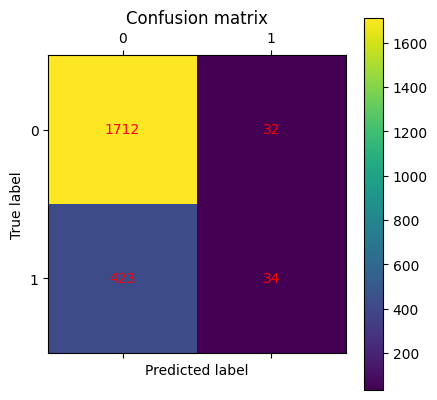

In [32]:
# cross-validation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = cross_val_predict(estimator=reg, X=X, y=y, cv=10)

cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)

print("Accuracy: %0.2f" % accuracy)
print("Confusion Matrix:\n", cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

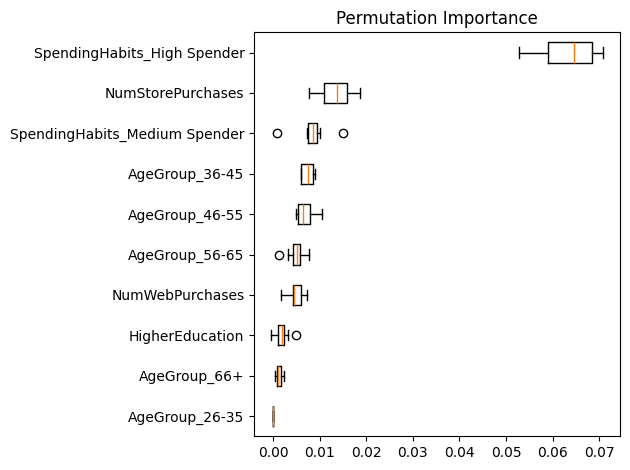

In [33]:
# feature importance
from sklearn.inspection import permutation_importance

result = permutation_importance(reg, X, y, n_repeats=10, scoring="accuracy", random_state=0, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()

In [34]:
df["Education"].value_counts()

Education
Graduation    1112
PhD            474
Master         363
2n Cycle       198
Basic           54
Name: count, dtype: int64